# Прогноз продаж интернет-магазина «Стримчик» на 2017 год

«Стримчик» - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценкок пользователей и экспертов, жанров и платформ.

**Цель проекта: требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.** 

### Загрузка файла с данными и изучение общей информации

In [1]:
# Подключаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import os

In [2]:
pth1 = '/Users/arseniybelov/Downloads/games.csv'
pth2 = '/datasets/games.csv'

try:
    if os.path.exists(pth1):
        data = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2)
    else:
        print('Something is wrong')
except:
    print('Something is wrong')

Посмотрим на первые и последние пять строк датафрейма

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Взглянем на общую информацию о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим и визуализируем пропущенные значения в нашем наборе данных

In [6]:
# Функция для визуализации пропущенных значений
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = True, fontsize = 16, grid=True)
            .set_title('Процент пропущенных значений в столбцах' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

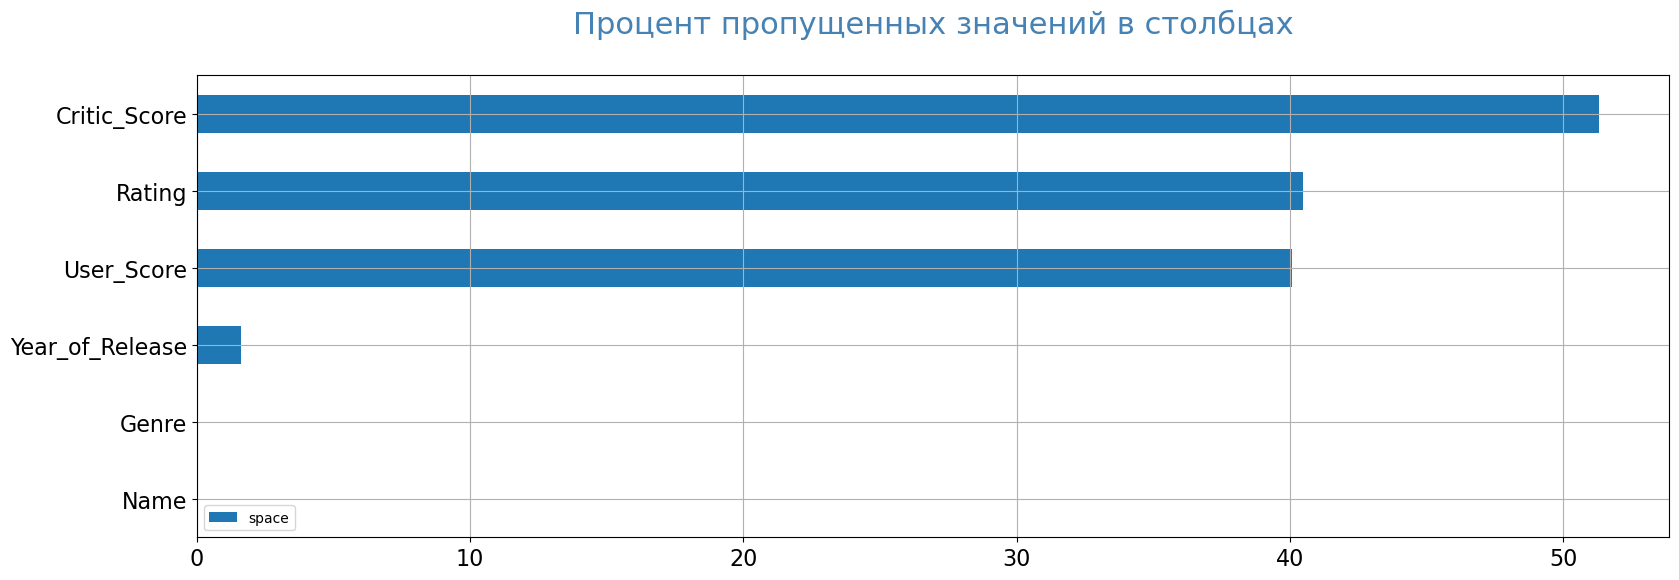

In [7]:
pass_value_barh(data)

Пропущенных значений в колонках Genre и Name настолько мало, что на графике они не отображаются ввиду масштаба, однако на график колонки попали, поэтому посчитаем, сколько пропущенных значений в этих колонках

In [8]:
# Считаем кол-во пропущенных значений в Genre и Name
print('Количество пропущенных значений в колонке Genre:', data['Genre'].isna().sum())
print('Количество пропущенных значений в колонке Name:', data['Name'].isna().sum())

Количество пропущенных значений в колонке Genre: 2
Количество пропущенных значений в колонке Name: 2


Всего лишь по два пропуска, посмотрим на них детальнее в следующем разделе

### Предобработка данных

#### Начнём с предобработки данных - изменим названия колонок (приведём к нижнему регистру)

In [9]:
# Приводим к нижнему регистру
data.columns= data.columns.str.lower()

#### Теперь заполним пропуски в колонках и изменим тип данных, где необходимо

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### year_of_release

In [11]:
data.year_of_release.describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [12]:
print('Количество пропущенных значений:', data['year_of_release'].isna().sum())

Количество пропущенных значений: 269


In [13]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Данный тип пропуска - MCAR (Missing Completely At Random), поэтому имеет смысл просто удалить данные наблюдения, их всего лишь 269

In [14]:
data = data.drop(index=data.loc[data['year_of_release'].isna()].index)

Изменим тип данных на целочисленный(вообще можно и на datetime), так как в этой колонке хранятся значения года

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

**Промежуточный вывод: определили тип пропусков в стобце, удалили их, изменили тип данных на правильный**

##### name & genre

In [16]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Аналогичная ситуация с пропусками, как и в колонке year_of_release, предлагаю просто удалить эти строки. Заметим, что эти же строки содержат пропуски в колонке genre

In [17]:
data = data.drop(index=data.loc[data['name'].isna()].index)

**Промежуточный вывод: удалили пропущенные значения**

##### critic_score

In [18]:
data.critic_score.describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [19]:
# Количество пропущенных значений
print('Количество пропущенных значений:', data['critic_score'].isna().sum())

Количество пропущенных значений: 8461


Взглянем на строки с пропущенными значениями в critic_score

In [20]:
data.loc[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [21]:
data.loc[data['critic_score'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Пропуски здесь имеют тип MCAR (Missing Completely At Random), в нашей выборке их 8461, поэтому придётся их оставить и работать с оставшимися данными. Их можно заменить на какое-нибдуь аномальное значение (заглушку), например, отрицательное значение. Поясню, почему я решил так не делать: дело в том, что на следующих этапах я буду делать исследовательскую и статистическую аналитику, в следствие чего придётся "отлавливать" эти значения, чтобы они не повлияли на статистики

**Промежуточный вывод: определили тип пропусков, не стали с ними ничего делать, так как их много, а строки, в которых они наблюдаются понадабятся нам для аналитики**

##### user_score

При вызове метода info, можно было обратить внимание на то, что user_score имеет тип данных object, что не свойственно для переменной, показывающей числовую оценку пользователей. Давайте посмотрим на уникальные значения, которые находятся в данной колонке

In [22]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы видим, что здесь есть непонятная абревиатура tdb. Изучив предметную область, выяснилось, что данная абревиатура расшифровывается как "To Be Determined" или будет определено. То есть для некоторых игр мнения пользователей всё ещё собираются

In [23]:
# Посмотрим на 5 строк с tbd
data.loc[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Тип данных object не позволяет нам работать с этим столбцом как с числами, а сам же тип данных object возникает из-за tdb, как и говорилось выше -> избавимся от tbd. Предлагаю заменить их на NaN, чтобы перевести в тип данных float

In [24]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'

Теперь переведём столбец во float

In [25]:
data['user_score'] = data['user_score'].astype('float')

Что касается пропусков - ситуация аналогичная кейсу в колонке critic_score -> просто оставляем пропуски

**Промежуточный вывод: разобрались, что обозначала абревиатура tdb, разобрались с типом пропусков, оставили их, так как строк с пропущенными значениями много, изменили тип данных столбца на правильный**

##### rating

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По смыслу понимаем, что данная переменная - категориальная, поэтому пропуски стоит заполнить категорией unknown. 

Если предполагать, как они могли появиться, то организация ESRB, которая проставляет этот рейтинг, начала свою деятельность в 1994 году. Более того, обслуживаемая территория данной организации - Северная америка. Предполагаю, что основные пропуски преобладают у игр, которые были разработаны до 1994 года или не были востребованы в Америке. Проверим данный факт

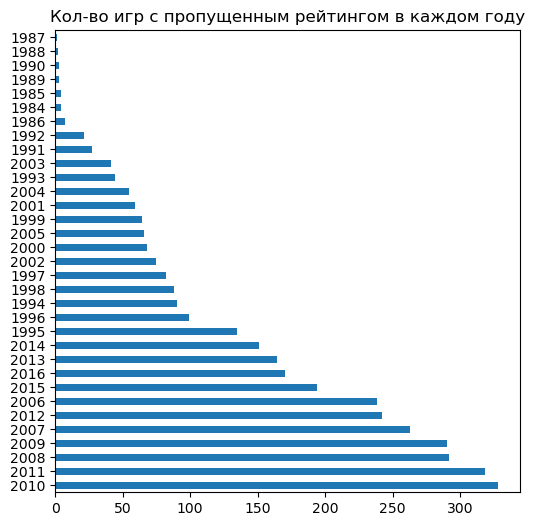

In [27]:
# Строим график
data.query('rating.isna() and na_sales == 0')['year_of_release'].value_counts().plot(kind='barh', figsize=(6, 6), title='Кол-во игр с пропущенным рейтингом в каждом году');

Предположения подтвердились, основная часть пропусков у игр, которые не популярны в регионе NA. Заполним пропуски значением unknown

In [28]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

Немного почитав про категории рейтинга компьютерных игр, можно заметить, что оценка K-A - старое название категории E10+ (до 1998 года), поэтому следует заменить K-A на E10+

In [29]:
data['rating'] = data['rating'].replace('K-A', 'E10+')

**Промежуточный вывод: разобрались из-за чего в данных наблюдается основная часть пропусков, визуализировали информацию, заменили устаревшие значения на современные, добавили новую категорию unknown и добавили в неё все пропущенные значения**

#### Добавление полезных колонок в датафрейм

Добавим колонку с общей суммой скачиваний во всех регионах

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод по этапу: определили столбцы, в которых наблюдаются пропуски, подправили их там, где это возможно. Добавили новый столбец total_sales, в котором объединили количество всех продаж.**

### Проведите исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

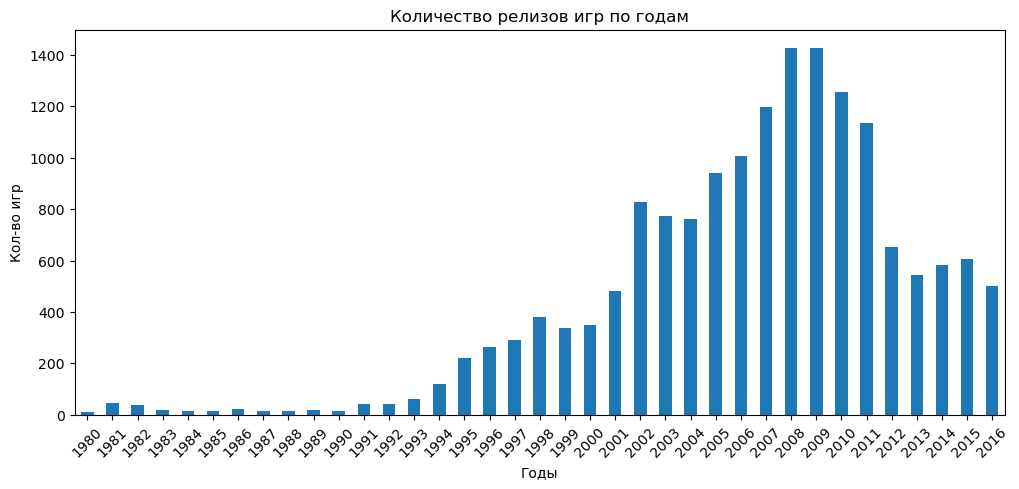

In [31]:
data.groupby('year_of_release')['name'].agg('count').reset_index() \
.plot(kind = 'bar', 
      y = 'name',
      x = 'year_of_release',
      ylabel = 'Кол-во игр',
      xlabel = 'Годы',
      legend=None,
      figsize = (12,5)) \
.set_title('Количество релизов игр по годам');
plt.xticks(rotation=45);

**Можем заметить, что со временем индустрия набирала всё бОльшие обороты, и количество выпускаемых игр заметно увеличилось (как и игровых платформ) относительно конца 20-ого века. Однако, если учесть, что мы планируем кампанию на 2017-й, рассматрение всей выборки для нашего исследования может быть лишним, поэтому предлагаю оставить период времени, начиная с 2012 года**

#### Посмотрим, как менялись продажи по платформам

Взглянем на платформы, для которых выпускались игры

In [32]:
print('Абревиатуры игровых платформ в нашем датасете:', data['platform'].unique())

Абревиатуры игровых платформ в нашем датасете: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Предлагаю заменить абревиатуры платформ на более информативные названия для лучшего понимания

In [33]:
data['platform'] = data['platform'].replace('Wii', 'Nintendo Wii')
data['platform'] = data['platform'].replace('NES', 'Nintendo NES')
data['platform'] = data['platform'].replace('GB', 'Game Boy')
data['platform'] = data['platform'].replace('DS', 'Nintendo DS')
data['platform'] = data['platform'].replace('X360', 'Xbox 360')
data['platform'] = data['platform'].replace('PS3', 'PlayStation 3')
data['platform'] = data['platform'].replace('PS2', 'PlayStation 2')
data['platform'] = data['platform'].replace('SNES', 'Nintendo SNES')
data['platform'] = data['platform'].replace('GBA', 'Game Boy Advance')
data['platform'] = data['platform'].replace('PS4', 'PlayStation 4')
data['platform'] = data['platform'].replace('3DS', 'Nintendo 3DS')
data['platform'] = data['platform'].replace('N64', 'Nintendo 64')
data['platform'] = data['platform'].replace('PS', 'PlayStation')
data['platform'] = data['platform'].replace('XB', 'Xbox')
data['platform'] = data['platform'].replace('2600', 'Atari 2600')
data['platform'] = data['platform'].replace('PSP', 'PlayStation Portable')
data['platform'] = data['platform'].replace('XOne', 'Xbox One')
data['platform'] = data['platform'].replace('WiiU', 'Nintendo Wii U')
data['platform'] = data['platform'].replace('GC', 'Nintendo GameCube')
data['platform'] = data['platform'].replace('GEN', 'SEGA Retro Genesis')
data['platform'] = data['platform'].replace('DC', 'Dendy Classic')
data['platform'] = data['platform'].replace('PSV', 'PS Vita')
data['platform'] = data['platform'].replace('SAT', 'Sega Saturn')
data['platform'] = data['platform'].replace('SCD', 'Sega CD')
data['platform'] = data['platform'].replace('WS', 'WonderSwan')
data['platform'] = data['platform'].replace('NG', 'Next Generation Gamer')
data['platform'] = data['platform'].replace('TG16', 'NEC TurboGrafx')
data['platform'] = data['platform'].replace('3DO', 'Panasonic 3DO')
data['platform'] = data['platform'].replace('GG', 'Game Gear')
data['platform'] = data['platform'].replace('PCFX', 'NEC PC-FX')

Определим платформы с наибольшим количеством суммарных продаж, рассматривая период с 2011 года, не вижу смысла рассматривать более ранние поколения игровых платформ, так как перед нами стоит задача построить прогноз на 2017 год

In [34]:
# ТОП-5 платформ по суммарным продажам
top_5_platforms = data.query('year_of_release >= 2011').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms

,total_sales
platform,
PlayStation 3,445.57
Xbox 360,380.38
PlayStation 4,314.14
Nintendo 3DS,257.81
Xbox One,159.32


Теперь построим для каждой распределение по годам, чтобы подробнее рассмотреть их пиковую популярность

In [35]:
# Получим названия TOP-5 платформ в виде списка
top_5_platforms_names = top_5_platforms.index.to_list()

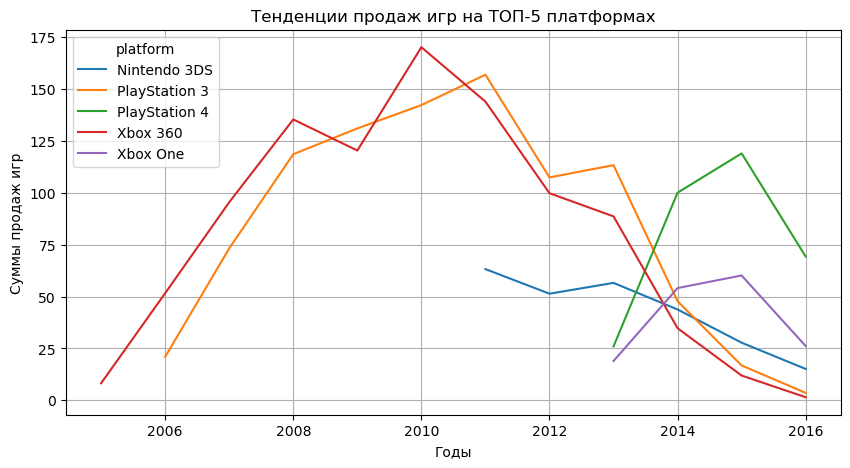

In [36]:
# ТОП-5 платформ по суммарным продажам
top_for_plot = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_for_plot.loc[:, top_for_plot.columns.intersection(top_5_platforms_names)].plot(grid=True, figsize=(10, 5), ylabel = 'Суммы продаж игр', xlabel = 'Годы',).set_title('Тенденции продаж игр на ТОП-5 платформах');

**На графике представлены распределения продаж игр на каждой из ТОП-5 платформ. Здесь мы явно видим, как одно поколение игровых платформ сменяет другое: Xbox 360 и PlayStation 3 являлись главными конкурентами в период 2006 - 2016 годов. Начиная с 2011 года в игру вступил Nintendo 3DS, который пользовался меньше популярностью относительно алтернативных платформ. А в 2013 году у PlayStation и Xbox появилось новое поколение платформ, в противостоянии которых лидировало PlayStation 4**

Теперь попробуем высчитать среднее время "жизни" одной платформы. Для этого я определю первый и последний годы выхода игр на каждой платформе

In [37]:
# Группируем по платформам и ищем минимальный и максимальный годы
data_for_mean_life_dur = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
data_for_mean_life_dur.columns = ['first_year', 'last_year']
data_for_mean_life_dur = data_for_mean_life_dur.sort_values(['first_year', 'last_year'])
data_for_mean_life_dur.reset_index(inplace=True)

Добавим в таблицу столбик с разницей между last_year и first_year

In [38]:
data_for_mean_life_dur['difference'] = data_for_mean_life_dur['last_year'] - data_for_mean_life_dur['first_year']
data_for_mean_life_dur

,platform,first_year,last_year,difference
0,Atari 2600,1980,1989,9
1,Nintendo NES,1983,1994,11
2,Nintendo DS,1985,2013,28
3,PC,1985,2016,31
4,Game Boy,1988,2001,13
5,SEGA Retro Genesis,1990,1994,4
6,Nintendo SNES,1990,1999,9
7,Game Gear,1992,1992,0
8,Sega CD,1993,1994,1
9,Next Generation Gamer,1993,1996,3


Предлагаю игнорировать платформы с деятельностью в 0 лет, будем считать их неудавшимися, а ещё стоит не брать во внимание компьютер, так как это платформа вечна:)

In [39]:
data_for_mean_life_dur = data_for_mean_life_dur.query('(difference != 0) and (platform != "PC")')

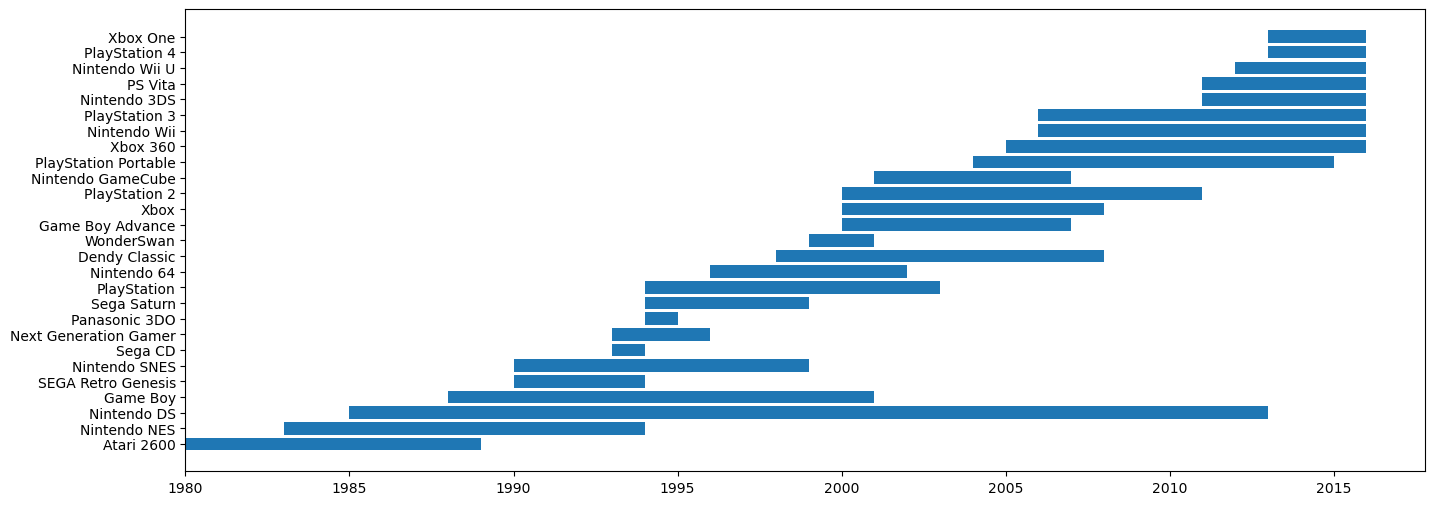

In [40]:
# Строим диаграмму Ганта
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(data_for_mean_life_dur.platform, data_for_mean_life_dur.difference, left=data_for_mean_life_dur.first_year)
plt.show()

**По графику существования игровых платформ мы видим, что модели стабильно заменялись более новыми стабильно в течение 5 лет, однако появление новых платформ не сразу вытесняло предыдущие поколения. Скорее всего, это связано с тем, что игры, производимые разработчиками, нуждались в адаптации под новые технологии и возможности платформ, но и, естественно, некоторые игровые платформы набирали такую поплуярность, что использовались "по инерции" ещё некоторое количество времени после выхода современных альтернатив**

#### Актуальный период

Как я и говорил ранее, предлагаю взять для дальнейшего анализа последние несколько лет, так как по предыдущим исследованиям мы видим, что сфера развивается динамично и стабильно. Предлагаю рассматривать всё, начиная с 2014 года

#### Лидирующие по продажам платформы, рост и падения

Обратимся к ранее построенному графику и будем работать с отфильтрованным датафреймом

In [41]:
actual_data = data.query('year_of_release >= 2014')

In [42]:
total_sales_leaders = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
total_sales_leaders.columns = ['total_sales']   

In [43]:
# ТОП-5 лидеров по продажам в актульный период
total_sales_leaders.sort_values(by='total_sales', ascending=False).head(5)

,total_sales
platform,
PlayStation 4,288.15
Xbox One,140.36
Nintendo 3DS,86.68
PlayStation 3,68.18
Xbox 360,48.22


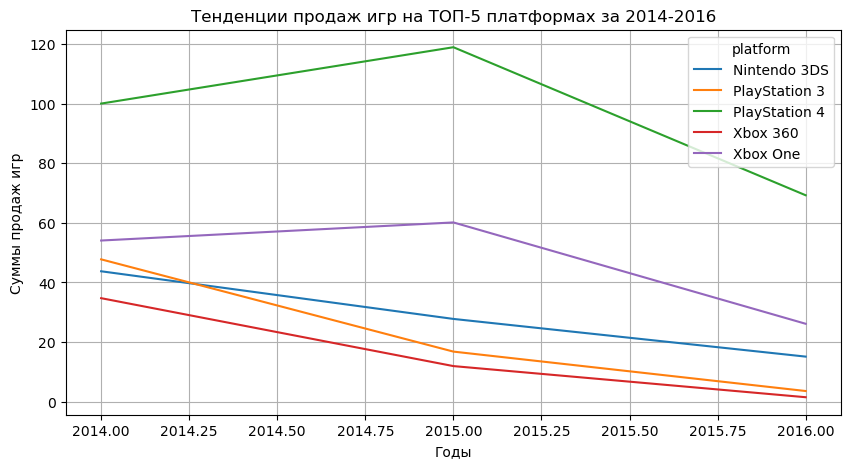

In [44]:
# Строим график
top_for_plot = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_for_plot.loc[:, top_for_plot.columns.intersection(top_5_platforms_names)].plot(grid=True, figsize=(10, 5), ylabel = 'Суммы продаж игр', xlabel = 'Годы').set_title('Тенденции продаж игр на ТОП-5 платформах за 2014-2016');

**Рассматривая данный график, можем сделать вывод, что "эра" PS3 и Xb360 подошла к своему завершению к 2016 году. Это вполне логично, потому что на рынке уже около 3 лет существуют их "дети". Nintendo 3DS так же, как и вышеупомянутые платформы, снизила свои охваты относительно начала периода. Лидирующими платформами являются PS4 и Xb One, что тоже логично, так как они являются самыми современными представителями игровых платформ. Из них двоих PS4 выглядит более потенциально прибыльной**

#### Детальный взгляд на лидирующие по продажам платформы

Посмотрим на описательную статистику данных платформ

In [45]:
data_for_top_platforms = data.query('(platform == "PlayStation 4") or (platform == "Xbox One")')

In [46]:
data_for_top_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PlayStation 4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
Xbox One,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

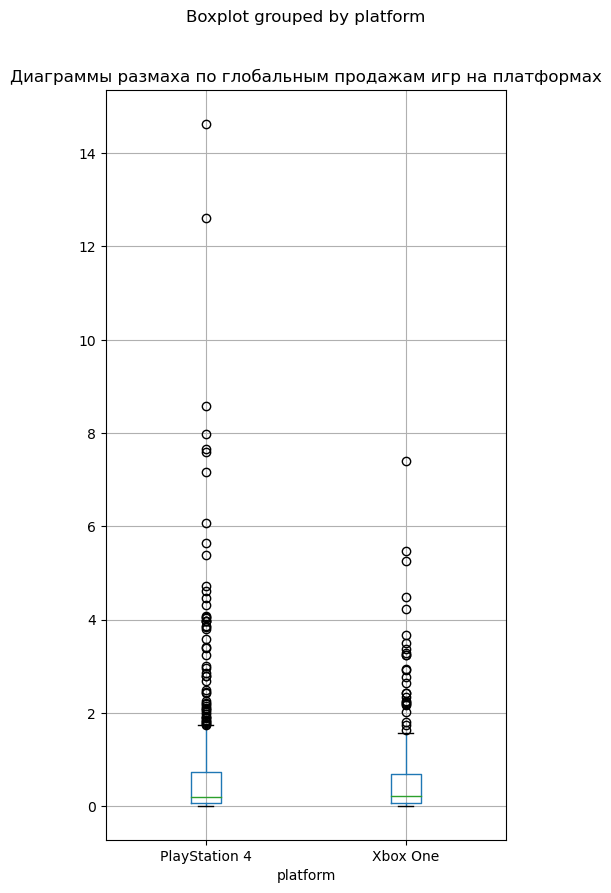

In [47]:
data.query('(platform == "PlayStation 4") or (platform == "Xbox One")').boxplot(column='total_sales', by='platform', figsize=(5, 10));
plt.title('Диаграммы размаха по глобальным продажам игр на платформах');

Выше мы видим график с выбросами, давайте посмотрим, что происходит внутри самих ящиков

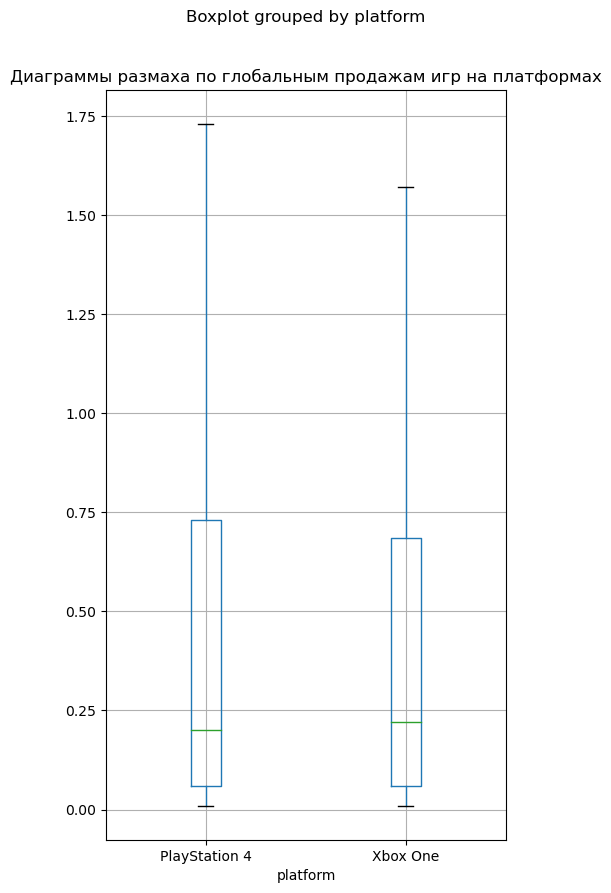

In [48]:
data.query('(platform == "PlayStation 4") or (platform == "Xbox One")').boxplot(column='total_sales', by='platform', figsize=(5, 10), showfliers=False);
plt.title('Диаграммы размаха по глобальным продажам игр на платформах');

**По диаграммам видно, что по медиане на игры потрачено одинаковое количество денег на обеих платформах по +- 0.2 млн. Есть выбросы, которые в данном случае обозначают игры, релиз которых ждали очень многие. Ну и ещё раз исследования подтверждают, что PlayStation 4 более прибыльная игровая платформа**

#### Как влияют на продажи внутри нескольких популярных платформ отзывы пользователей и критиков

Предлагаю рассмотреть платформы PlayStation 4 и Xbox One. Построим диаграмму рассеяния и проведём корреляционный тест, чтобы проверить взаимосвязь между продажами на платформе и отзывами пользователей/критиков 

**Для PlayStation 4**

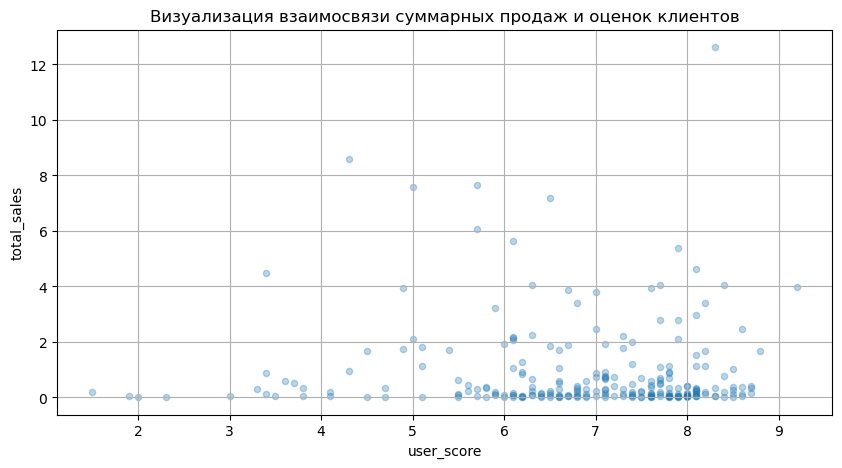

In [49]:
# Для user_score
actual_data[actual_data['platform'] =='PlayStation 4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
plt.title('Визуализация взаимосвязи суммарных продаж и оценок клиентов');
plt.show()

Так как мы решили игнорировать пропуски в данных (Available-case analysis), рассчитанные значения коэффициентов корреляции могут оказаться вне диапазона [-1; 1]. Поэтому предварительно нужно отфильтровать пропуски

In [50]:
# Корреляционный тест
data_for_cor_user = actual_data.query('platform == "PlayStation 4"').dropna(subset=['user_score'])
print('Коэффициент корреляции между суммой продаж и оценкой пользователей:', data_for_cor_user['total_sales'].corr(data_for_cor_user['user_score']))

Коэффициент корреляции между суммой продаж и оценкой пользователей: -0.040131589472697356


**Исходя из диаграммы рассеяния и корреляционного теста мы видим, что взаимосвязи между суммой продаж и оценкой пользователей нет. Более того, она здесь слабо отрицательная. Возможно это связано с тем, что есть несколько кейсов, в которых пользователи ожидали выхода конкретной игры, покупали и разочаровались в покупке**

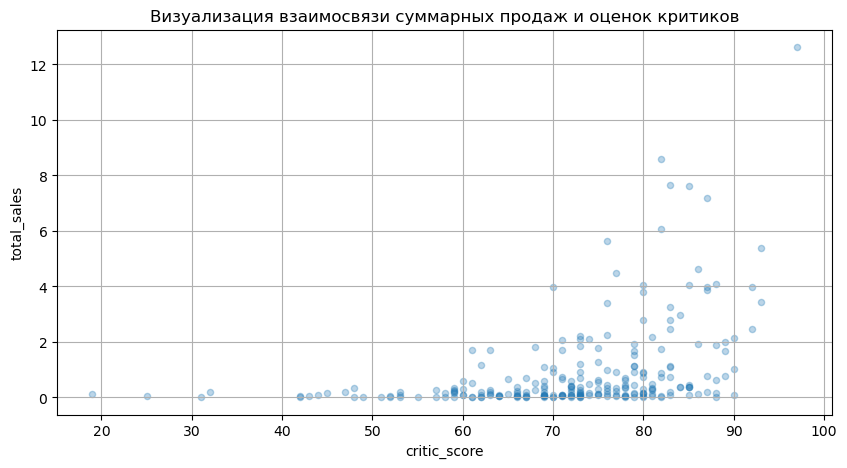

In [51]:
# Для critic_score
actual_data[actual_data['platform'] =='PlayStation 4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
plt.title('Визуализация взаимосвязи суммарных продаж и оценок критиков');
plt.show()

In [52]:
# Корреляционный тест
data_for_cor_critic = actual_data.query('platform == "PlayStation 4"').dropna(subset=['critic_score'])
print('Коэффициент корреляции между суммой продаж и оценкой критиков:', data_for_cor_critic['total_sales'].corr(data_for_cor_critic['critic_score']))

Коэффициент корреляции между суммой продаж и оценкой критиков: 0.40266141068104083


**Для Xbox One**

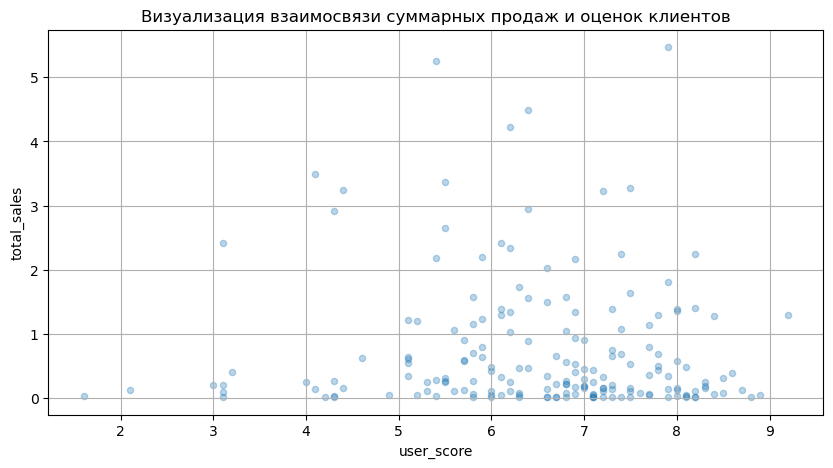

In [53]:
# Для user_score
data[data['platform'] =='Xbox One'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
plt.title('Визуализация взаимосвязи суммарных продаж и оценок клиентов');
plt.show()

Так как мы решили игнорировать пропуски в данных (Available-case analysis), рассчитанные значения коэффициентов корреляции могут оказаться вне диапазона [-1; 1]. Поэтому предварительно нужно отфильтровать пропуски

In [54]:
# Корреляционный тест
data_for_cor_user = actual_data.query('platform == "Xbox One"').dropna(subset=['user_score'])
print('Коэффициент корреляции между суммой продаж и оценкой пользователей:', data_for_cor_user['total_sales'].corr(data_for_cor_user['user_score']))

Коэффициент корреляции между суммой продаж и оценкой пользователей: -0.0703839280647581


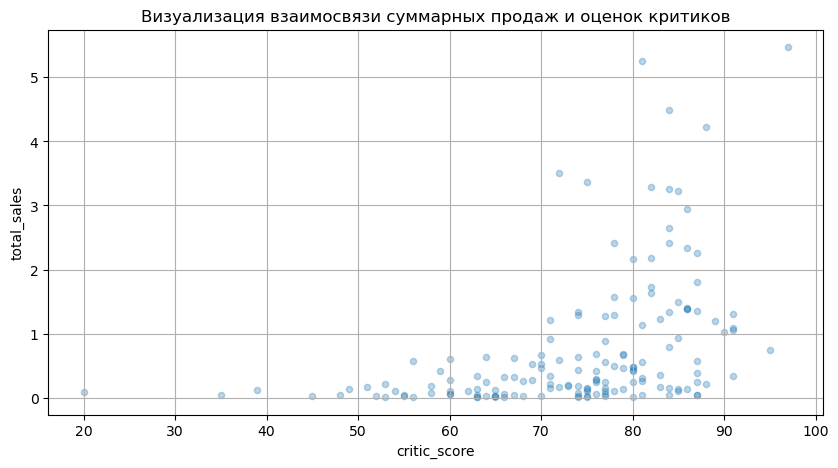

In [55]:
# Для critic_score
actual_data[actual_data['platform'] =='Xbox One'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
plt.title('Визуализация взаимосвязи суммарных продаж и оценок критиков');
plt.show()

In [56]:
# Корреляционный тест
data_for_cor_critic = actual_data.query('platform == "Xbox One"').dropna(subset=['critic_score'])
print('Коэффициент корреляции между суммой продаж и оценкой критиков:', data_for_cor_critic['total_sales'].corr(data_for_cor_critic['critic_score']))

Коэффициент корреляции между суммой продаж и оценкой критиков: 0.42867694370333226


**Между этими переменными лучше проглядывается взаимосвязь, но всё равно она слабо положительная. По графику видно, что по мере увеличения количества продаж, оценки критиков начинают увеличиваться. Скорее всего, такая разница между user_score и critic_score связана с тем, что у вторых независимое, объективное мнение в отличие от пользователей, которые имеют ожидания и платят деньги**

#### Продажами игр на других платформах

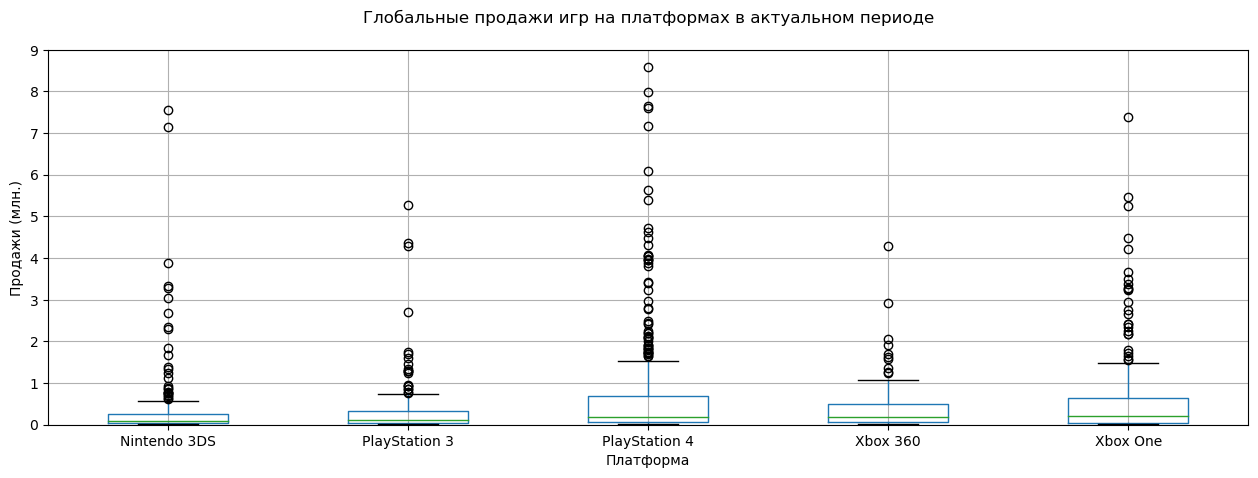

In [57]:
# Рассмотрим платформы, вошедшие в актуальный период
actual_platforms = ['Nintendo 3DS', 'Xbox 360', 'PlayStation 3', 'Xbox One', 'PlayStation 4']

data_for_sales_analys = actual_data.query('platform in @actual_platforms')

data_for_sales_analys.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.suptitle('Глобальные продажи игр на платформах в актуальном периоде')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Продажи (млн.)')
plt.ylim(0, 9)
plt.show()

Посмотрим на графики без выбросов

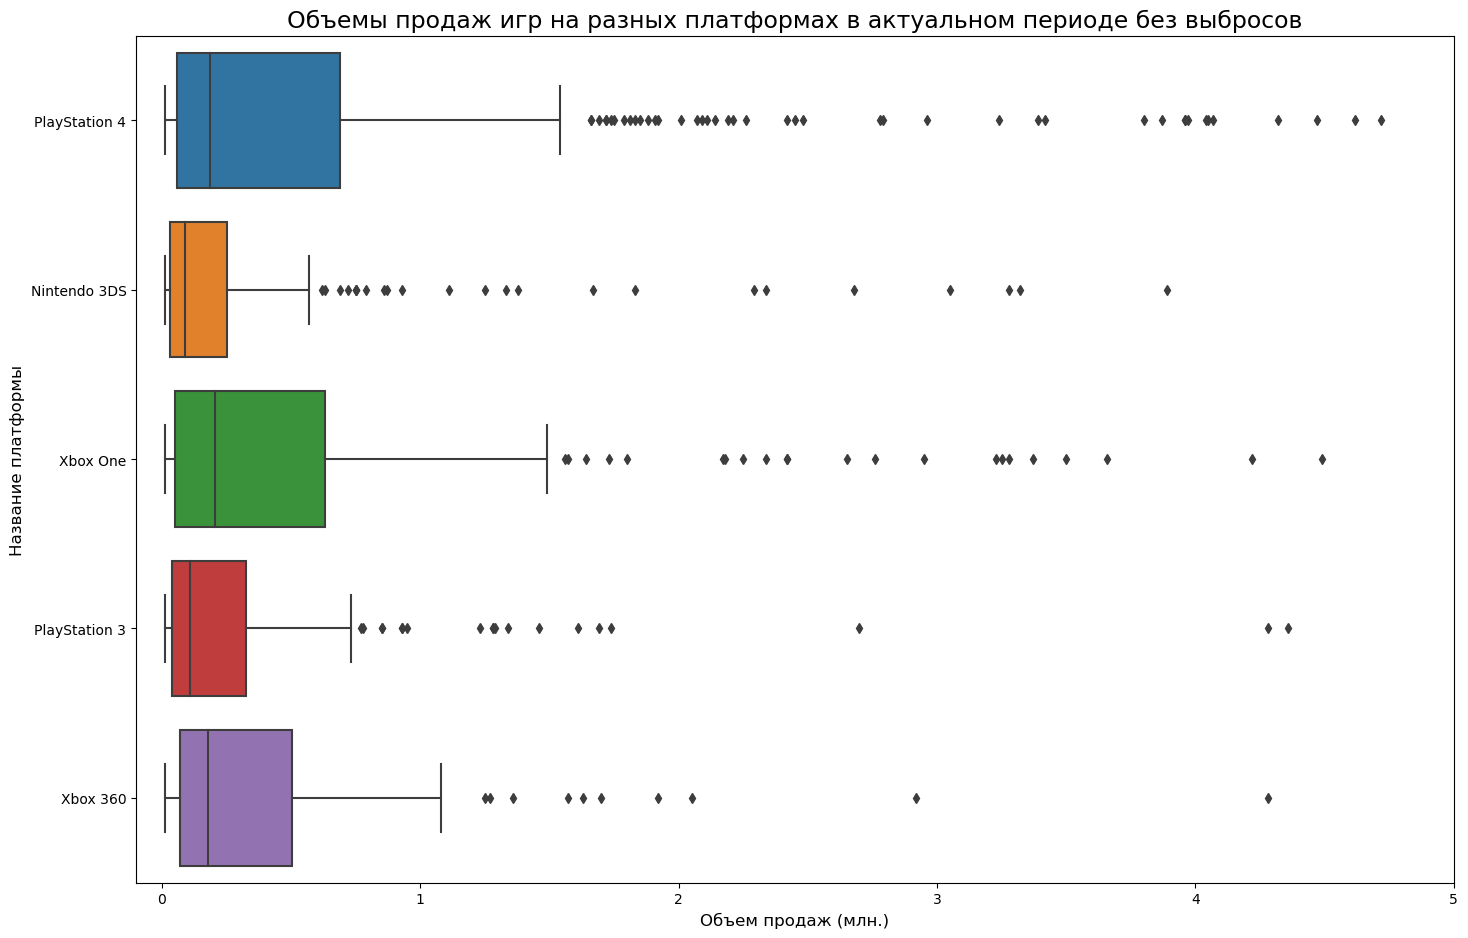

In [58]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_for_sales_analys, y='platform', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах в актуальном периоде без выбросов', size=17)
plt.xlabel('Объем продаж (млн.)', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

**Промежуточный вывод: можем увидеть, что объём продаж у старых платформ PS3 и X360. Nintendo 3DS немного остаёт от них. В старом поколении игровых платформ лидировал Xbox 360. Новое же поколение платформ (PS4 и XOne) явно выделяется на их фоне.**

#### Общее распределение игр по жанрам

In [59]:
# Посмотрим на вариации жанров в нашем датасете
print('Список вариаций жанров игр в нашем датасете:', data['genre'].unique())

Список вариаций жанров игр в нашем датасете: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


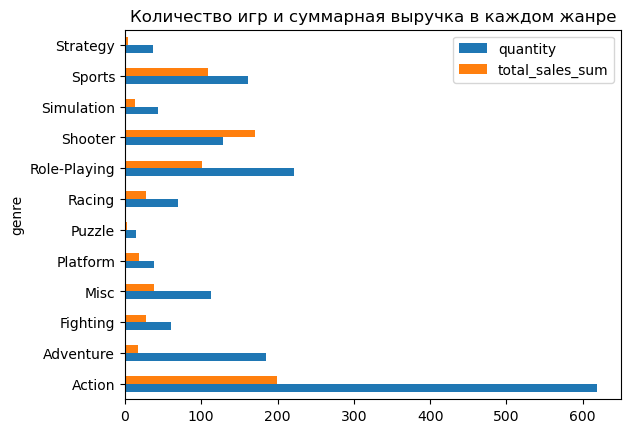

In [60]:
data_for_genre_plot = (
    actual_data
    .pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
)
data_for_genre_plot.columns = ['quantity', 'total_sales_sum']
data_for_genre_plot.plot(kind='barh');
plt.title('Количество игр и суммарная выручка в каждом жанре');

**Пояснение: мы видим, что жанр Action(экшн) является самым популярным для разработанных игр, и обладает самой большой выручкой по продажам. НО... Стоит обратить внимание на отношения суммарной выручки продаж к количеству игр, выпущенных в этом жанре. В таком случае лидером является жанр Shooter, который покупался очень много, относительно выпущенного количества игр в этом жанре. Самым же непопулярным жанром в выборке с 2014 года является Puzzle, продаж почти не было** 

### Портрет пользователя каждого региона

#### ТОП-5 популярных платформ для пользователей каждого региона (NA, EU, JP)

##### ТОП-5 для NA

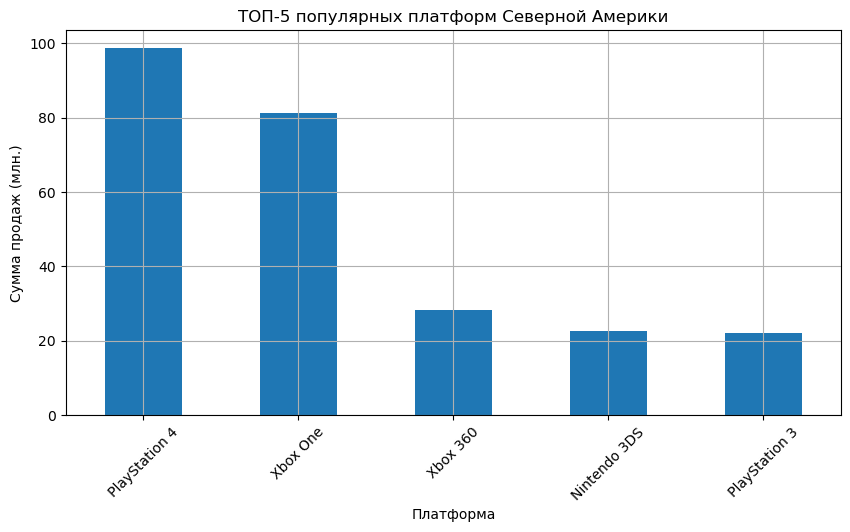

In [61]:
(actual_data
    .groupby('platform')['na_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных платформ Северной Америки')
)
plt.xticks(rotation=45)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

Мы видим, что с 2014 года рынок полностью за PLayStation 4 и Xbox One. PS4 лидирует по платформам в регионе Северной Америки, несмотря на то, что Xbox - разработана американской компанией Microsoft. Посчитаем и визуализируем доли, занимаемые этими платформами на рынке данного региона 

In [62]:
# Доли продаж в Северной Америке
platform_sales_na = (actual_data
                     .groupby('platform')['na_sales'].sum()
                     .sort_values(ascending=False)
                     .head(5)
)
percentage_sales_na = platform_sales_na / platform_sales_na.sum()

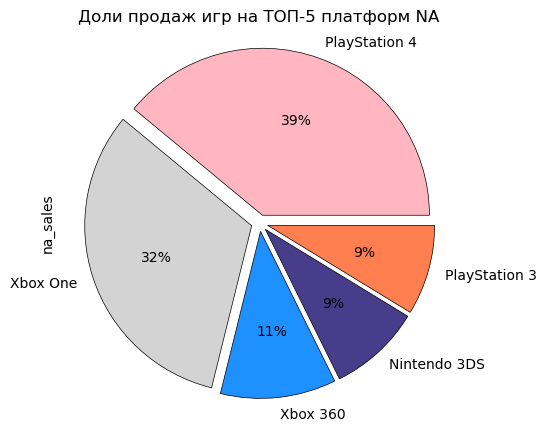

In [63]:
colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

percentage_sales_na.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                  figsize= (5, 5)).set_title('Доли продаж игр на ТОП-5 платформ NA');
plt.axis('equal');

##### ТОП-5 для EU

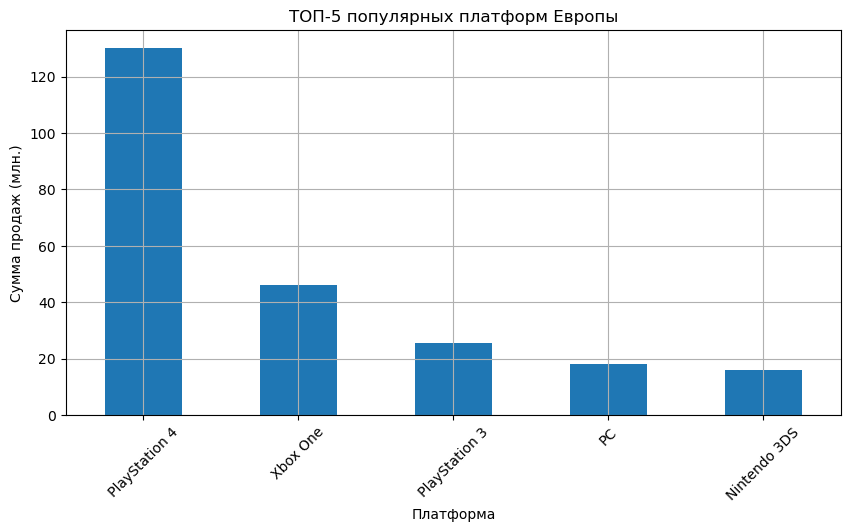

In [64]:
(actual_data
    .groupby('platform')['eu_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(10, 5), grid=True, title = 'ТОП-5 популярных платформ Европы')
)
plt.xticks(rotation=45)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

Мы видим, что с 2014 года PlayStation 4 лидирует по платформам в регионе Европы, а приставка нового поколения (Xbox One) значительно отсаёт. Посчитаем и визуализируем доли, занимаемые этими платформами на рынке данного региона

In [65]:
# Доли продаж в Европе
platform_sales_eu = (actual_data
                     .groupby('platform')['eu_sales'].sum()
                     .sort_values(ascending=False)
                     .head(5)
)
percentage_sales_eu = platform_sales_eu / platform_sales_eu.sum()

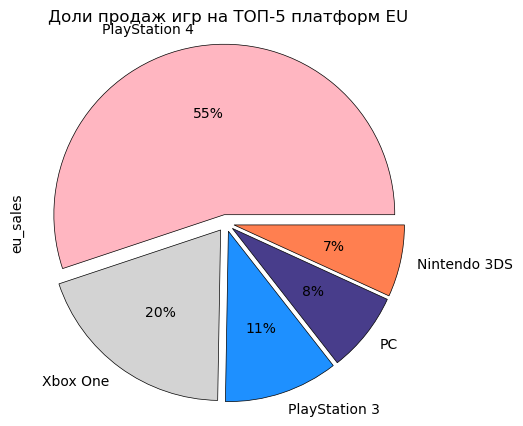

In [66]:
colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

percentage_sales_eu.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                  figsize= (5, 5)).set_title('Доли продаж игр на ТОП-5 платформ EU');
plt.axis('equal');

##### ТОП-5 для JP


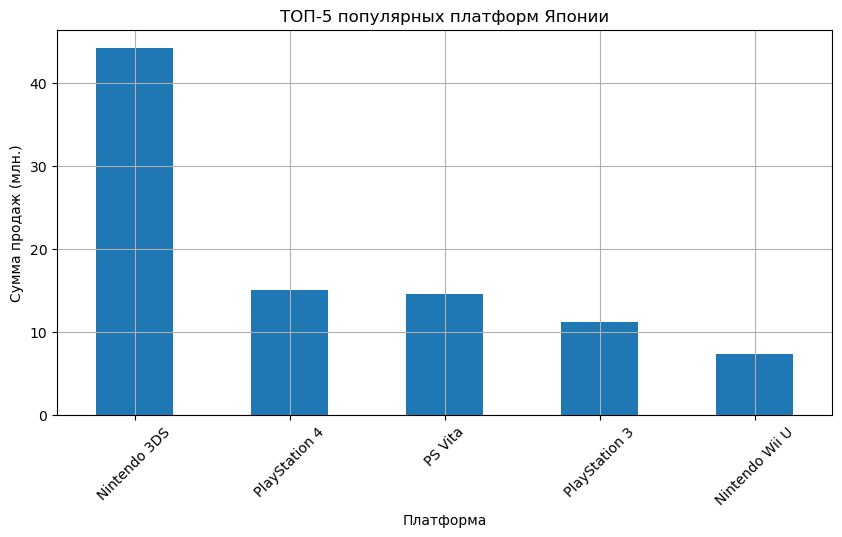

In [67]:
(actual_data
    .groupby('platform')['jp_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(10, 5), grid=True, title = 'ТОП-5 популярных платформ Японии')
)
plt.xticks(rotation=45)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

**Мы видим, что с 2014 года Nintendo 3DS остаётся лидером по платформам в регионе Японии, что неудивительно, так как компания японская. Отметим, что в данной выборке нет Xbox, в Японии популярен отечественный производитель (PlayStation тоже японская). Посчитаем и визуализируем доли, занимаемые этими платформами на рынке данного региона**

In [68]:
# Доли продаж в Японии
platform_sales_jp = (actual_data
                     .groupby('platform')['jp_sales'].sum()
                     .sort_values(ascending=False)
                     .head(5)
)
percentage_sales_jp = platform_sales_jp / platform_sales_jp.sum()

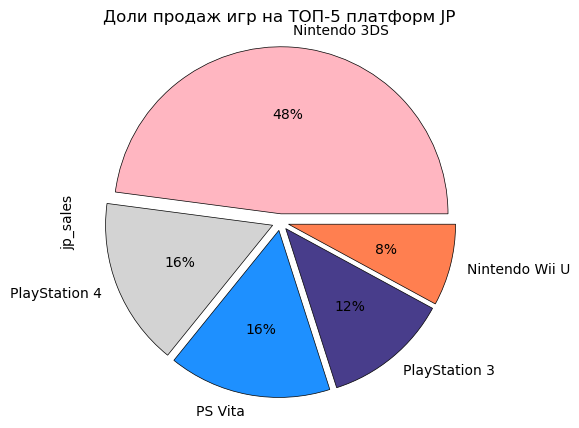

In [69]:
colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

percentage_sales_jp.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                  figsize= (5, 5)).set_title('Доли продаж игр на ТОП-5 платформ JP');
plt.axis('equal');

#### ТОП-5 популярных  жанров для пользователей каждого региона (NA, EU, JP)

##### ТОП-5 для NA

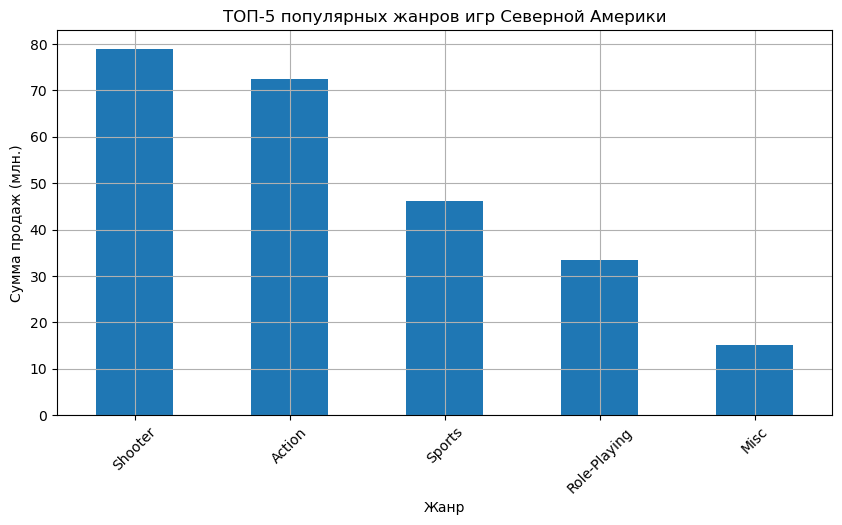

In [70]:
(actual_data
    .groupby('genre')['na_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных жанров игр Северной Америки')
)
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

##### ТОП-5 для EU

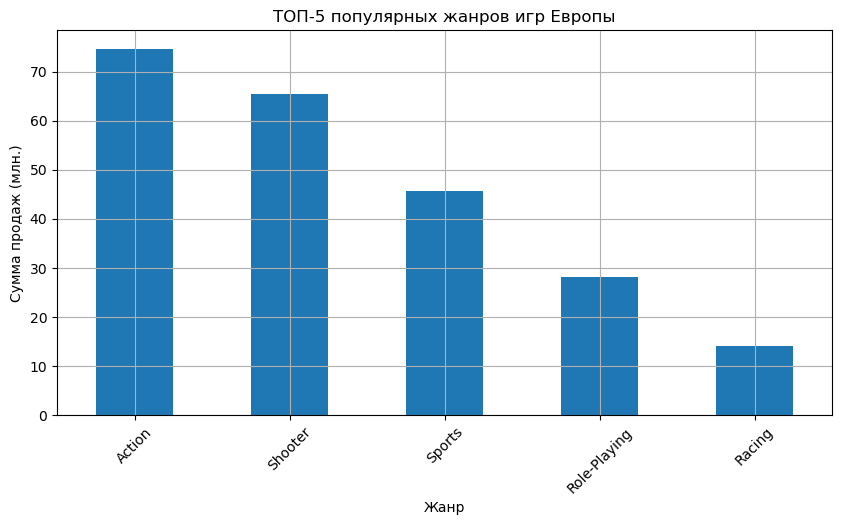

In [71]:
(actual_data
    .groupby('genre')['eu_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных жанров игр Европы')
)
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

##### ТОП-5 для JP

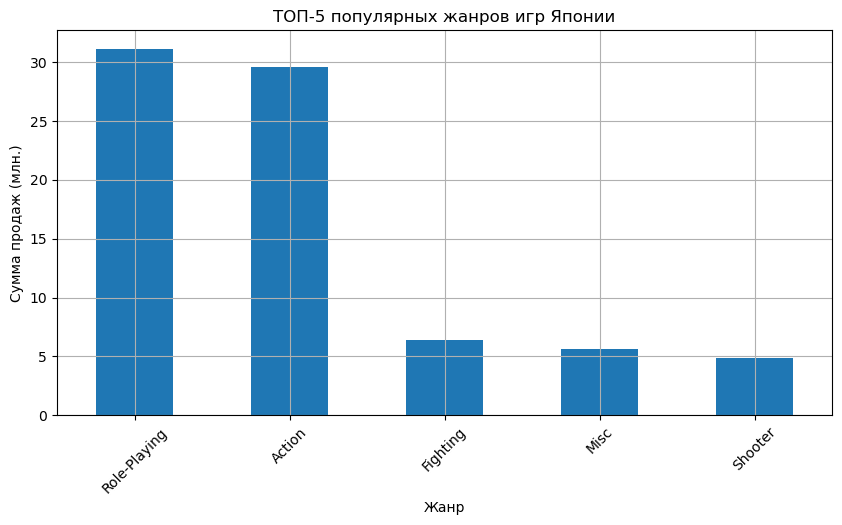

In [72]:
(actual_data
    .groupby('genre')['jp_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных жанров игр Японии')
)
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

In [73]:
# Проверим, есть ли жанр Shooter на Nintendo
print('Количество проданных шутеров на самую популярную игровую платформу Японии:', actual_data.query('(platform == "Nintendo 3DS") and (genre == "Shooter")').shape[0])

Количество проданных шутеров на самую популярную игровую платформу Японии: 0


Что и требовалось ожидать, жанр Shooter в Японии не популярен, возможно это связано с запретами жестоких видов игр на территории региона, а также есть вероятность, что шутеры не разрабатываются для самой популярной игровой платформы

**Промежуточный вывод: наблюдается следующая картина - в Северной Америке и Европе популярные жанры схожи, так как схожи и используемые платформы, более того, в Японии на первом месте по популярности жанр, который стоит на 4-ом месте у двух других регионов, ввиду разных интересов геймеров и используемых девайсов**

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### ТОП-5 для NA

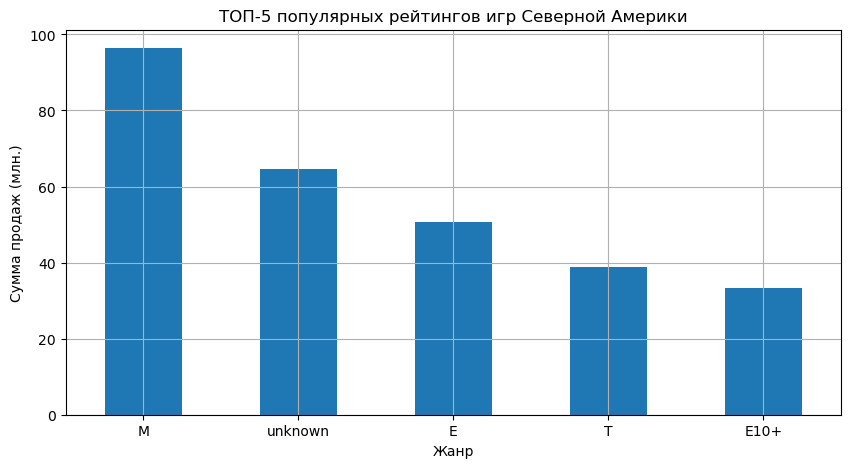

In [74]:
(actual_data
    .groupby('rating')['na_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных рейтингов игр Северной Америки')
)
plt.xticks(rotation=0)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

В Северной Америке самые высокие рейтинги у M или mature (материалы игры не подходят для подростков младше 17 лет), на третьем месте преобладают рейтинги E или everyone (для всех)

##### ТОП-5 для EU

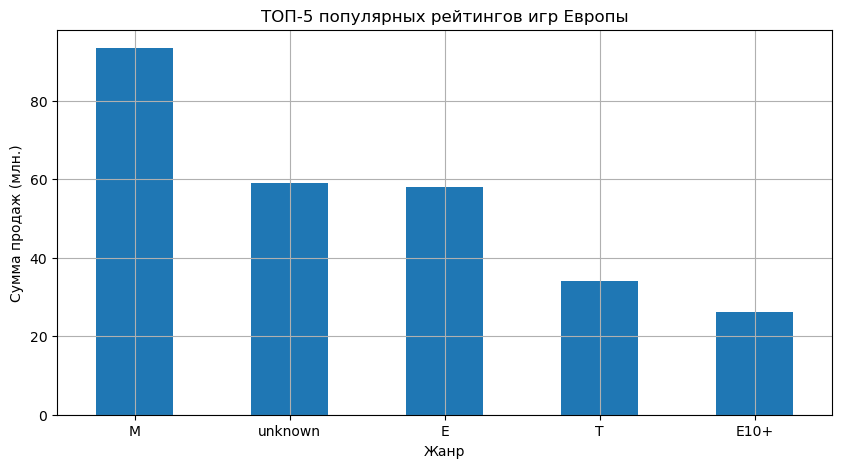

In [75]:
(actual_data
    .groupby('rating')['eu_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных рейтингов игр Европы')
)
plt.xticks(rotation=0)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

В Европе ситуация аналогичная ситуации Северной Америки

##### ТОП-5 для JP

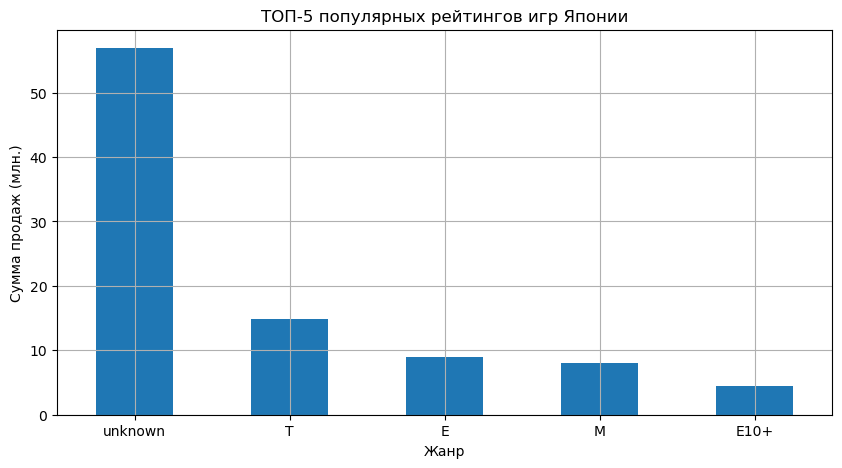

In [76]:
(actual_data
    .groupby('rating')['jp_sales'].sum()
    .sort_values(ascending=False).head(5)
    .plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'ТОП-5 популярных рейтингов игр Японии')
)
plt.xticks(rotation=0)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж (млн.)')
plt.show()

А вот в Японии довольно трудно оценить ситуацию, так как основная часть данных неизвестна

Ещё раз посмотрим на круговые диаграммы, чтобы было удобнее сравнивать между собой

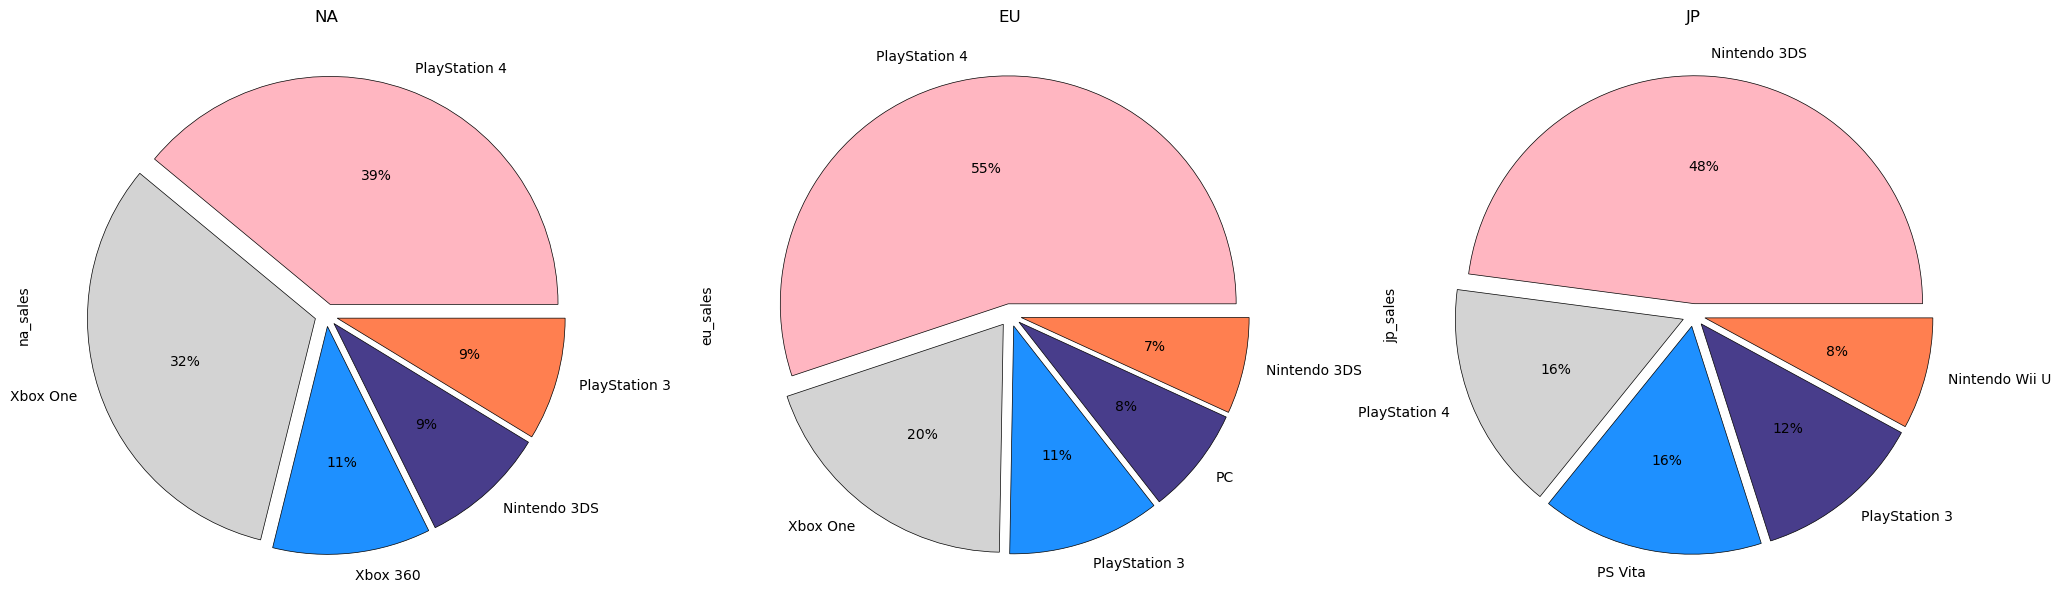

In [118]:
colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

plt.subplot(1, 3, 1);
percentage_sales_na.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                    figsize= (25, 15)).set_title('NA');


colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

plt.subplot(1, 3, 2);
percentage_sales_eu.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                    figsize= (25, 15)).set_title('EU');


colors = ['#FFB6C1', '#D3D3D3', '#1E90FF', '#483D8B', '#FF7F50']

explode = (00.05, 0.05, 0.05, 0.05, 0.05)

plt.subplot(1, 3, 3);
percentage_sales_jp.plot(
    kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 0.5,
                    'antialiased': True}, 
                    figsize= (25, 15)).set_title('JP');


plt.show()

### Проверка гипотез

Сформулируем их слудующим образом:

#### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и алтернативную гипотезы:
 * H0: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
 * H1: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

In [80]:
# Отфильтруем и сравним выборки
data_xbox = actual_data.query('(platform == "Xbox One") and (user_score.notna())')
data_pc = actual_data.query('(platform == "PC") and (user_score.notna())')
xbox_score = data_xbox['user_score']
pc_score = data_pc['user_score']
print('Длина выборки Xbox One:', len(xbox_score))
print('Длина выборки PC:', len(pc_score))

Длина выборки Xbox One: 165
Длина выборки PC: 122


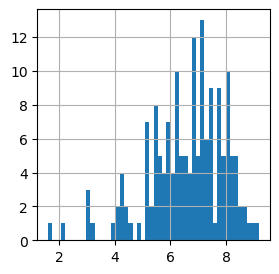

In [81]:
xbox_score.hist(bins=50, figsize=(3, 3));

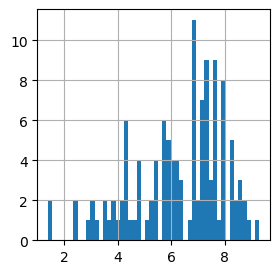

In [82]:
pc_score.hist(bins=50, figsize=(3, 3));

* Генеральные совокупности не зависят друг от друга
* Выборочные средние должны быть нормально распределены
* Выборки несильно отличаются по размерам, дисперсии генеральных совокупностей +- равны

Следовательно можем использовать t-test для сравнения двух средних

In [83]:
alpha = .05
results = st.ttest_ind(
xbox_score,
pc_score,
equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и алтернативную гипотезы:
 * H0: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports
 * H1: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

In [84]:
# Отфильтруем и сравним выборки
data_action = actual_data.query('(genre == "Action") and (user_score.notna())')
data_sports = actual_data.query('(genre == "Sports") and (user_score.notna())')
action_score = data_action['user_score']
sports_score = data_sports['user_score']
print('Длина выборки Action:', len(action_score))
print('Длина выборки Sports:', len(sports_score))

Длина выборки Action: 297
Длина выборки Sports: 127


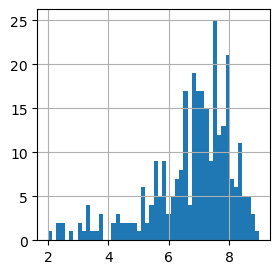

In [85]:
action_score.hist(bins=50, figsize=(3, 3));

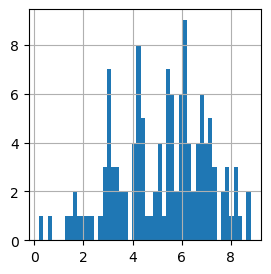

In [86]:
sports_score.hist(bins=50, figsize=(3, 3));

* Генеральные совокупности не зависят друг от друга
* Выборочные средние должны быть нормально распределены
* Выборки несильно отличаются по размерам, дисперсии генеральных совокупностей +- равны

Следовательно можем использовать t-test для сравнения двух средних

In [87]:
alpha = .05
results = st.ttest_ind(
action_score,
sports_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Промежуточный вывод: по результатам полученным при проведении статистического теста мы не можем отвергнуть нулевую гипотезу. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий. Видимо, пользователи имеют разное мнение об играх на данных платформах. Что же касается второй гипотезы, то по результатам статистического теста мы отвергаем нулевую гипотезу, возможно, что пользователи по-разному относятся к жанрам игр Action и Sports**

### Общий вывод

В данном проекте были получены данные с большим количеством пропущенных значений, которые мешали дальнейшим исследованиям, поэтому мы:
 * Провели предобработку данных, а именно:
     - Убрали или заменили пропуски там, где могли 
     - Добавили нужные для анализа столбцы
     - В связи с тем, что наша задача состояла в прогнозировании продаж на 2017, в основном работали со срезом 2014-2016
 * Провели исследовательский анализ данных, в ходе которого выяснили, что:
     - Игровая индустрия начала стремительно развиваться после 1994 года
     - Самыми популярными платформами на рынке в мире являются:
         - PlayStation 4 c суммарными продажами в 288.15 млн.
         - Xbox One c суммарными продажами в 140.36 млн.
         - Nintendo 3DS c суммарными продажами в 86.68 млн.
         - PlayStation 3 c суммарными продажами в 68.18 млн.
         - Xbox 360 c суммарными продажами в 48.22 млн.
     - Взаимосвязи между суммарными продажами и оценками пользователей нет, но с оценками критиков слабая коррелляция (~0.4) присутсвует
 * Определили ТОП-5 используемых платформ, популярных жанров и оценок ESRB за релевантный период (2014 - 2016)
 
**В 2017 году нужно делать акцент на платформы PS4 и Xbox One, потому что это платформы последнего поколения, и их "предки" всё сильнее теряют популярность со временем, и в 2015-2016 уже лидируют вышеназванные представители. Не стоит забывать и про Nintendo 3DS, чтобы не терять аудиторию региона Японии. 
Говоря про сами компьютерные игры - самыми популярными являются шутеры, также можно обратить внимание на жанр Action, Sports и Role-Playing. Что же касается рейтинга ESRB, то продажи от него зависят несильно, но пользователей из Северной Америки и Европы привлекают игры с рейтингом Mature ("Для взрослых").**